In [4]:
!pip install seaborn

     -------------------------------------- 293.3/293.3 kB 2.0 MB/s eta 0:00:00


In [8]:
!pip install scikit-learn

     ---------------------------------------- 7.1/7.1 MB 6.2 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 6.2 MB/s eta 0:00:00


In [33]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk(r"C:\Users\Dizug\OneDrive\Escritorio\Titanic ML"):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [45]:
train_df = pd.read_csv(r"C:\Users\Dizug\OneDrive\Escritorio\Machine Learning\Titanic ML\train.csv")
test_df  = pd.read_csv(r"C:\Users\Dizug\OneDrive\Escritorio\Machine Learning\Titanic ML\test.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
train_df.shape

(891, 12)

In [47]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [48]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [49]:
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
test_df["Age"].fillna(test_df["Age"].median(), inplace=True)
train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)
test_df["Embarked"].fillna(test_df["Embarked"].mode()[0], inplace=True)
train_df.drop("Cabin", axis=1, inplace=True)
test_df.drop("Cabin", axis=1, inplace=True)

In [50]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

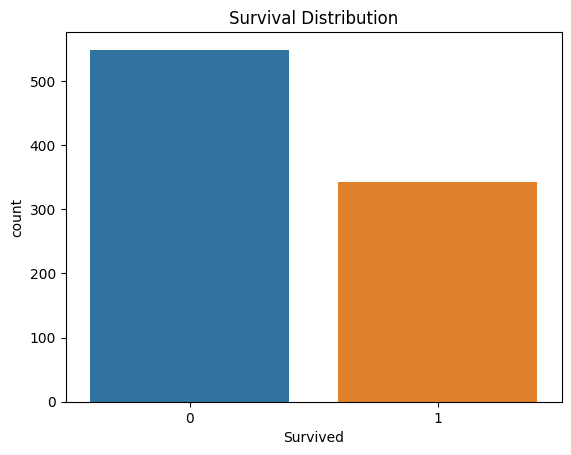

In [51]:
sns.countplot(x="Survived", data=train_df)
plt.title("Survival Distribution")
plt.show()

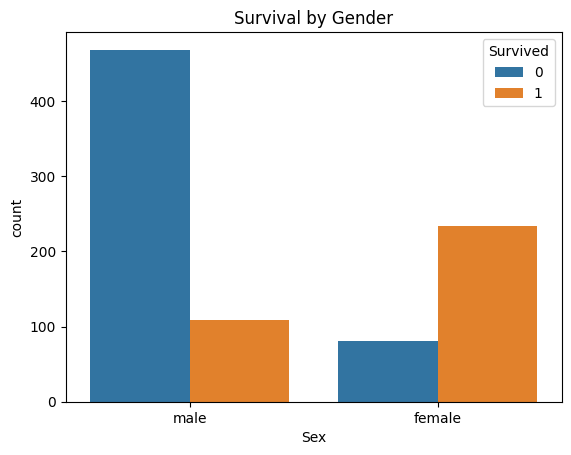

In [52]:
sns.countplot(x="Sex", hue="Survived", data=train_df)
plt.title("Survival by Gender")
plt.show()

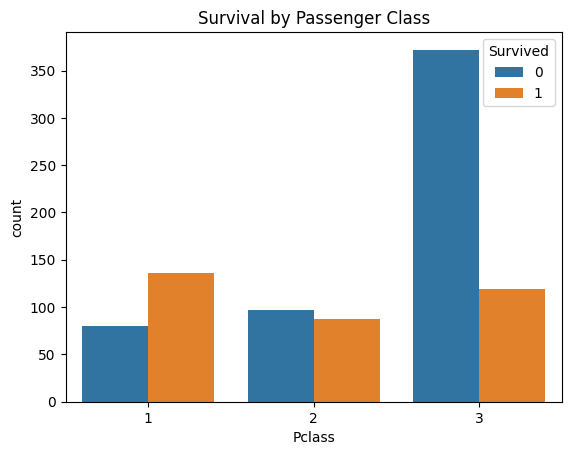

In [53]:
sns.countplot(x="Pclass", hue="Survived", data=train_df)
plt.title("Survival by Passenger Class")
plt.show()

In [54]:
train_df["FamilySize"] = train_df["SibSp"] + train_df["Parch"] + 1
test_df["FamilySize"]  = test_df["SibSp"] + test_df["Parch"] + 1
print(train_df['FamilySize'].value_counts())


1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64


In [28]:
le = LabelEncoder()

for col in ["Sex", "Embarked"]:
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])
    print(train_df[['Sex','Embarked']].value_counts())
    

Sex  Embarked
1    2           441
0    2           205
1    0            95
0    0            73
1    1            41
0    1            36
Name: count, dtype: int64
Sex  Embarked
1    2           441
0    2           205
1    0            95
0    0            73
1    1            41
0    1            36
Name: count, dtype: int64


In [33]:
X = train_df.drop(["Survived", "PassengerId", "Name", "Ticket"], axis=1)
y = train_df["Survived"]
X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [35]:
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_valid_scaled)

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    random_state=42
)

rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_valid_scaled)

pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_valid, lr_pred),
        accuracy_score(y_valid, rf_pred)
    ]
})

,Model,Accuracy
0,Logistic Regression,0.798883
1,Random Forest,0.804469


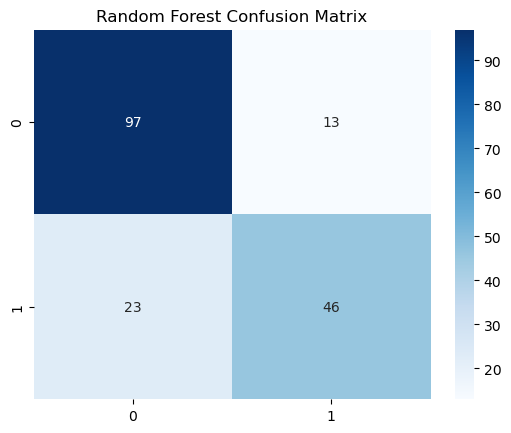

In [36]:
sns.heatmap(
    confusion_matrix(y_valid, lr_pred),
    annot=True,
    fmt="d",
    cmap="Blues"
)
plt.title("Random Forest Confusion Matrix")
plt.show()

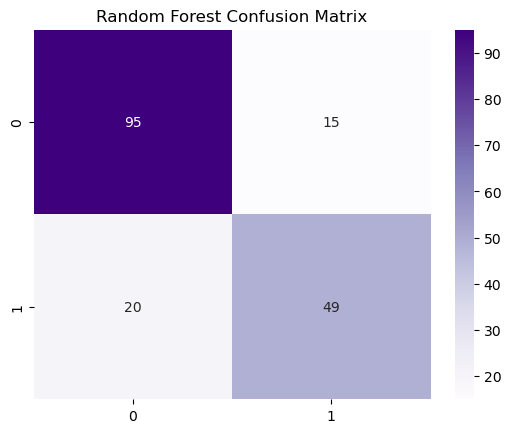

In [39]:
sns.heatmap(
    confusion_matrix(y_valid, rf_pred),
    annot=True,
    fmt="d",
    cmap="Purples"
)
plt.title("Random Forest Confusion Matrix")
plt.show()

In [40]:
rf.fit(X, y)

,n_estimators,200
,criterion,'gini'
,max_depth,12
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [41]:
lr.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [42]:
test_ids = test_df["PassengerId"]

test_df = test_df.drop(["PassengerId", "Name", "Ticket"], axis=1)
test_df_scaled = scaler.transform(test_df)

test_predictions = rf.predict(test_df_scaled)

In [52]:
submission = pd.DataFrame({
    "PassengerId": test_ids,
    "Survived": test_predictions
})

submission.to_csv(r"C:\Users\Dizug\OneDrive\Escritorio\Titanic ML\submission.csv", index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [51]:
test_df_scaled2 = scaler.transform(test_df)
test_predictions = rf.predict(test_df_scaled2)

submission2 = pd.DataFrame({
    "PassengerId": test_ids,
    "Survived": test_predictions
})

submission2.to_csv(r"C:\Users\Dizug\OneDrive\Escritorio\Titanic ML\submission2.csv", index=False)
submission2.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
